In [ ]:
import h5py
import matplotlib
import matplotlib.pyplot as pyplot
mFN="nonparmorphs_SB25_12filters_all_FILES.hdf5"

def get_all_morph_val(msF,sk,fk,keyname,camera=None):
    if camera is None:
        morph_array = np.concatenate( (msF['nonparmorphs'][sk][fk]['CAMERA0'][keyname].value,
                                       msF['nonparmorphs'][sk][fk]['CAMERA1'][keyname].value,
                                       msF['nonparmorphs'][sk][fk]['CAMERA2'][keyname].value,
                                       msF['nonparmorphs'][sk][fk]['CAMERA3'][keyname].value) )
    else:
        morph_array = msF['nonparmorphs'][sk][fk][camera][keyname].value

    return morph_array


def get_all_snap_val(msF,sk,keyname,camera=None):
    if camera is None:
        val_array = np.concatenate( (msF['nonparmorphs'][sk][keyname].value,
                                     msF['nonparmorphs'][sk][keyname].value,
                                     msF['nonparmorphs'][sk][keyname].value,
                                     msF['nonparmorphs'][sk][keyname].value) )
    else:
        val_array = msF['nonparmorphs'][sk][keyname].value

    return val_array

['nonparmorphs']
['ACS-F435W', 'ACS-F606W', 'ACS-F814W', 'BHMdot_Msunperyr', 'Cameras', 'Filters', 'Mbh_Msun', 'Mhalo_Msun', 'Mstar_Msun', 'NC-F115W', 'NC-F150W', 'NC-F200W', 'NC-F277W', 'NC-F356W', 'NC-F444W', 'SFR_Msunperyr', 'SubfindID', 'WFC3-F105W', 'WFC3-F160W', 'WFC3-F336W']
[  7.60825184e+11   3.65927342e+10   4.23583375e+10 ...,   1.32765204e+10
   3.27196447e+10   4.54891643e+10]
['APPROXPSF_ARCSEC', 'ASYM', 'AXC', 'AYC', 'CC', 'CC_ERR', 'CFLAG', 'ELONG', 'FLAG', 'GINI', 'IMFILES', 'M20', 'MAG', 'MAG_ERR', 'MID1_A1', 'MID1_A2', 'MID1_AREA', 'MID1_DSTAT', 'MID1_GINI', 'MID1_ISTAT', 'MID1_M20', 'MID1_MPRIME', 'MID1_SNP', 'MID2_A1', 'MID2_A2', 'MID2_DSTAT', 'MID2_ISTAT', 'MID2_MPRIME', 'M_A', 'M_I2', 'ORIENT', 'PIX_ARCSEC', 'REDSHIFT', 'RHALF', 'RHALF_ERR', 'RMS', 'RP', 'RP_ERR', 'SEG_AREA', 'SEG_ECCENT', 'SEG_ELLIPT', 'SEG_EQRAD', 'SEG_SMAJSIG', 'SEG_SMINSIG', 'SNPIX', 'SUNRISE_ABSMAG']
z=  2.00203
[ 0.54627514  0.51852459  0.42111731 ...,  0.47785673  0.51014042
  0.38805512]


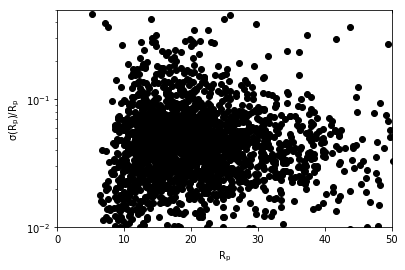

(2233,) (2233,)
(8932,) (8932,)


In [45]:
with h5py.File(mFN,'r') as msF:
    print(list(msF.keys()))
    print(list(msF['nonparmorphs/snapshot_068/'].keys()))
    print(msF['nonparmorphs/snapshot_068/Mstar_Msun'].value)
    print(list(msF['nonparmorphs/snapshot_068/WFC3-F160W/CAMERA0'].keys()))
    
    print('z= ',msF['nonparmorphs/snapshot_068/WFC3-F160W/CAMERA0/REDSHIFT'].value[0])
    
    gini=msF['nonparmorphs/snapshot_068/WFC3-F160W/CAMERA0/GINI'].value
    print(gini)
    
    rp=msF['nonparmorphs/snapshot_068/WFC3-F160W/CAMERA0/RP'].value
    rp_err=msF['nonparmorphs/snapshot_068/WFC3-F160W/CAMERA0/RP_ERR'].value
    
    mstar = msF['nonparmorphs/snapshot_068/Mstar_Msun'].value
    
    pyplot.semilogy(rp,rp_err/rp,'ok'); pyplot.xlim(0.0,50.0) ; pyplot.ylim(0.01,0.5)
    pyplot.ylabel(r'$\sigma(R_p)/R_p$') ; pyplot.xlabel(r'$R_p$')
    pyplot.show()
    
    print(mstar.shape, gini.shape) #note need to concat lists of Mstar, Gini to use all 4 cameras
    
    mstar_all = get_all_snap_val(msF,'snapshot_068','Mstar_Msun')
    gini_all = get_all_morph_val(msF,'snapshot_068','WFC3-F160W','GINI')
    
    print(mstar_all.shape, gini_all.shape)

    